<span style="font-size: 30px;">**Titanic**</span>



O Titanic é um dos navios mais famosos e trágicos da história marítima. Lançado em **1912** pela **White Star Line**, sua construção foi uma proeza de engenharia para a época. No entanto, sua viagem inaugural, que começou em **Southampton**, **Inglaterra**, e tinha como destino **Nova York**, terminou em desastre quando o navio colidiu com um iceberg no Atlântico Norte. O naufrágio do Titanic resultou em uma das maiores tragédias marítimas da história, com a perda de mais de 1.500 vidas. Este evento chocante não apenas teve um impacto imediato na segurança marítima, mas também deixou um legado duradouro, inspirando inúmeras obras de arte, filmes, livros e debates sobre segurança, classe social e responsabilidade. Nesta introdução, exploraremos tanto os aspectos históricos quanto culturais desse acontecimento marcante.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Carregar o conjunto de dados
titanic_data = pd.read_csv("./dataset/titanic.csv")

# Exibir as primeiras linhas do DataFrame para verificar se foi carregado corretamente
print(titanic_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


In [89]:
# Estatísticas básicas para variáveis numéricas
print("\nEstatísticas básicas para variáveis numéricas:")
print(titanic_data.describe())
len(titanic_data)
#Dicionario dos dados titanic
#https://www.kaggle.com/c/titanic/data


Estatísticas básicas para variáveis numéricas:
       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  332.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   14.181209    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   21.000000    0.000000    0.000000   
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare    Survived  
count  417.000000  418.000000  
mean    35.627188    0.377990  
std     55.907576    0.485466  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.500000    1.000000  
max    512.329200    1.000000  


418

In [90]:
titanic_data.dtypes

PassengerId       int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Survived          int64
age_group      category
dtype: object

Observando os dados acima em Count observamos que existe muitos dados faltante por exemplo em "Age" lembando que usamos o len para fazer uma contagem de dados e existe cerca de 418 linhas para cada coluna onde no caso do age existe uma contagem de 332 ou seja 86 dados faltantes.

In [59]:
# Tabela de frequência para variáveis categóricas
print("Sexo dos passageiros")
print(titanic_data['Sex'].value_counts())

Sexo dos passageiros
Sex
male      266
female    152
Name: count, dtype: int64


temos quase 2/3 a mais de homens que mulheres

In [60]:
#The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
print("pais/filhos a bordo do Titanic")
print(titanic_data['Parch'].value_counts())

pais/filhos a bordo do Titanic
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64


In [18]:
#pclass: A proxy for socio-economic status (SES)
#1st = Upper
#2nd = Middle
#3rd = Lower
print("Classe de ingresso de embarque 1 = 1st, 2 = 2nd, 3 = 3rd")
print(titanic_data['Pclass'].value_counts())

Classe de ingresso de embarque 1 = 1st, 2 = 2nd, 3 = 3rd
Pclass
3    218
1    107
2     93
Name: count, dtype: int64


In [70]:
print("Idade dos passageiros")
print(titanic_data['Age'].value_counts())
print("a idade minima {} e idade maxima {}".format(titanic_data['Age'].min(), titanic_data['Age'].max()))

Idade dos passageiros
Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64
a idade minima 0.17 e idade maxima 76.0


In [20]:
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
print("Número de irmãos/cônjuges a bordo do Titanic")
print(titanic_data['SibSp'].value_counts())

Número de irmãos/cônjuges a bordo do Titanic
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


In [21]:
print("Número do bilhete")
print(titanic_data['Ticket'].value_counts())

Número do bilhete
Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64


In [1]:
print("Tarifa do passageiros")
print(titanic_data['Fare'].value_counts())


Tarifa do passageiros


NameError: name 'titanic_data' is not defined

In [23]:
print("Número da cabine")
print(titanic_data['Cabin'].value_counts())

Número da cabine
Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64


In [24]:
print("Porto de embarcação C = Cherbourg, Q = Queenstown, S = Southampton")
print(titanic_data['Embarked'].value_counts())

Porto de embarcação C = Cherbourg, Q = Queenstown, S = Southampton
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [25]:
print("Sobrevivencia 0 = não, 1 = sim \n")
print(titanic_data['Survived'].value_counts())

Sobrevivencia 0 = não, 1 = sim 

Survived
0    260
1    158
Name: count, dtype: int64


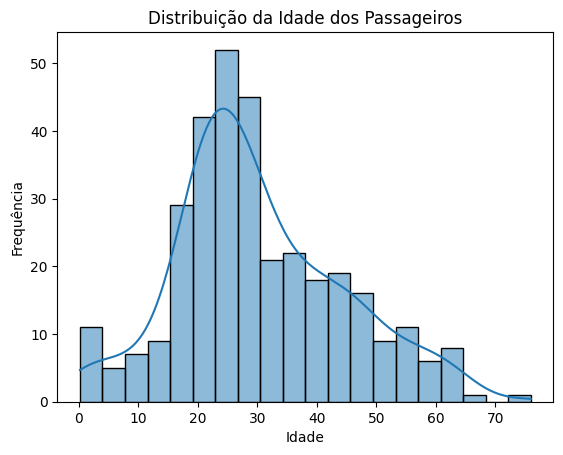

In [71]:
# Visualizar a distribuição da idade dos passageiros
sns.histplot(titanic_data['Age'].dropna(), bins=20, kde=True)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade dos Passageiros')
plt.show()

maioria das pessoas tinham entre 15 até 30 anos

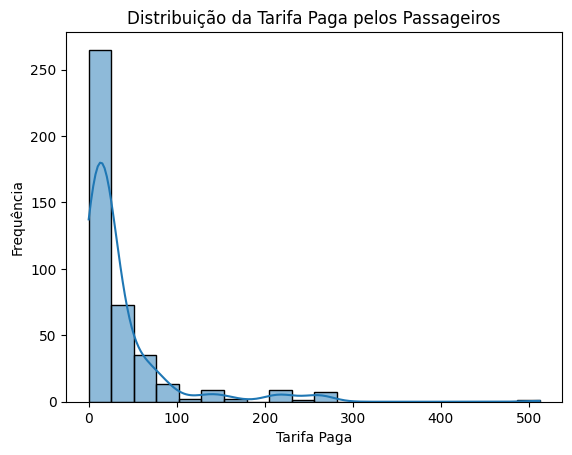

In [93]:
# Visualizar a distribuição da tarifa paga pelos passageiros
sns.histplot(titanic_data['Fare'], bins=20, kde=True)
plt.xlabel('Tarifa Paga')
plt.ylabel('Frequência')
plt.title('Distribuição da Tarifa Paga pelos Passageiros')
plt.show()

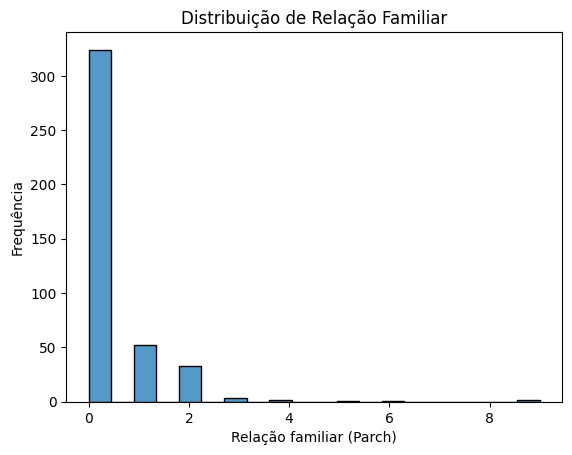

In [100]:
#The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
sns.histplot(titanic_data['Parch'], bins=20)
plt.xlabel('Relação familiar (Parch)')
plt.ylabel('Frequência')
plt.title('Distribuição de Relação Familiar')
plt.show()

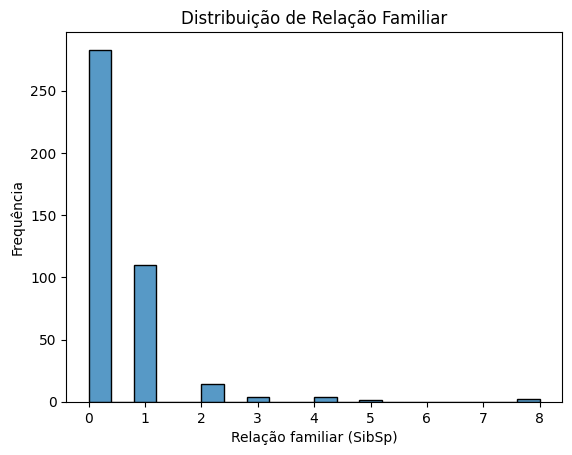

In [99]:
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
sns.histplot(titanic_data['SibSp'], bins=20)
plt.xlabel('Relação familiar (SibSp)')
plt.ylabel('Frequência')
plt.title('Distribuição de Relação Familiar')
plt.show()

A grande maioria das pessoas tinham tarifas abaixo de 100

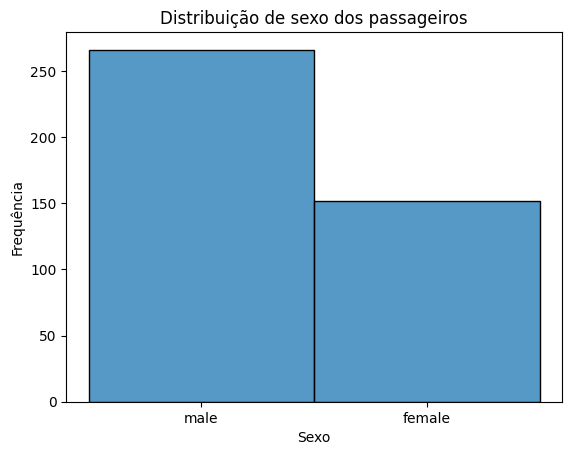

In [74]:
# Visualizar a distribuição de sexo
sns.histplot(titanic_data['Sex'], bins=20, )
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.title('Distribuição de sexo dos passageiros')
plt.show()

cerca de 2/3 a mais de homens que mulheres

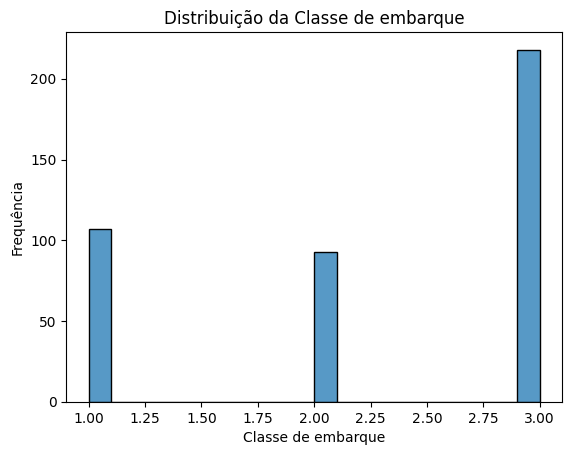

In [75]:
# Visualizar a Distribuição da Classe de embarque
sns.histplot(titanic_data['Pclass'], bins=20)
plt.xlabel('Classe de embarque')
plt.ylabel('Frequência')
plt.title('Distribuição da Classe de embarque')
plt.show()

a grande maioria das pessoas eram da 3 classe porém existe mais pessoas da 1 classe que da 2 classe

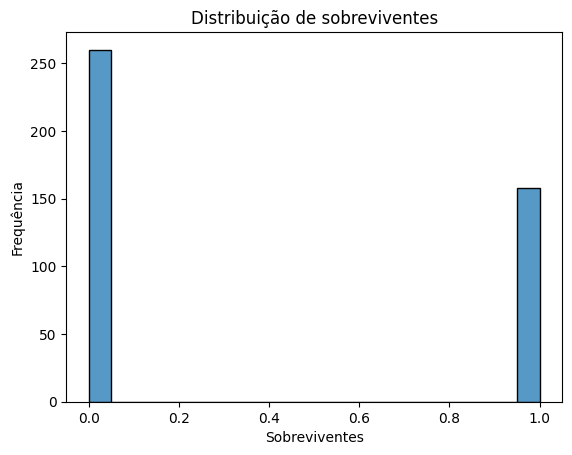

In [78]:
# Visualizar a distribuição de sobrevivencia
#0 = óbito
#1 = sobreviveu
sns.histplot(titanic_data['Survived'], bins=20)
plt.xlabel('Sobreviventes')
plt.ylabel('Frequência')
plt.title('Distribuição de sobreviventes')
plt.show()

a maioria das pessoas foram a óbito

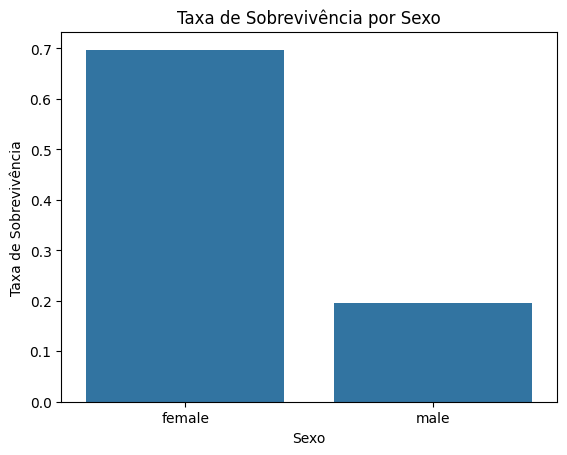

In [85]:
# Calcular a taxa de sobrevivência por sexo
survival_by_sex = titanic_data.groupby('Sex')['Survived'].mean()
# Visualizar a relação entre sexo e sobrevivência
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()

maioria das pessoas que sobreviveram foram mulheres apesar de ter mais homens que mulheres 

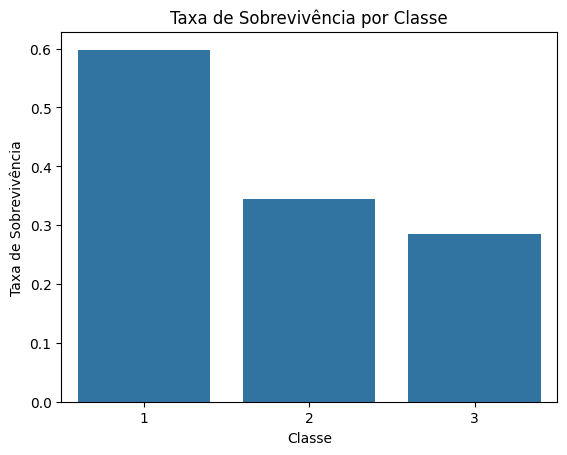

In [86]:
# Calcular a taxa de sobrevivência por classe
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

# Visualizar a relação entre classe e sobrevivência
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Classe')
plt.show()

a maioria das pessoas que sobreviveram eram da 1 classe 

C:\Users\ander\AppData\Local\Temp\ipykernel_1904\2568943734.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = titanic_data.groupby('age_group')['Survived'].mean()


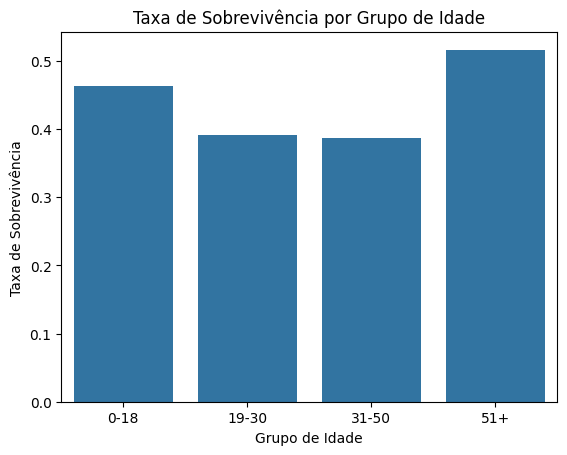

In [88]:
# Dividir os passageiros em grupos de idade
titanic_data['age_group'] = pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 80], labels=['0-18', '19-30', '31-50', '51+'])

# Calcular a taxa de sobrevivência por grupo de idade
survival_by_age_group = titanic_data.groupby('age_group')['Survived'].mean()

# Visualizar a relação entre idade e sobrevivência
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values)
plt.xlabel('Grupo de Idade')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Grupo de Idade')
plt.show()

os grupos que mais sobreviveram foi de crianças/adolecente e acima dos 51

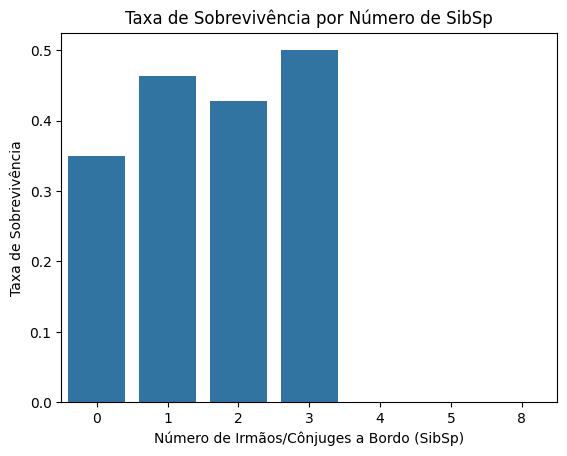

In [91]:
#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

# Calcular a taxa de sobrevivência por número de irmãos/cônjuges a bordo
survival_by_sibsp = titanic_data.groupby('SibSp')['Survived'].mean()

# Visualizar a relação entre SibSp e sobrevivência
sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values)
plt.xlabel('Número de Irmãos/Cônjuges a Bordo (SibSp)')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Número de SibSp')
plt.show()

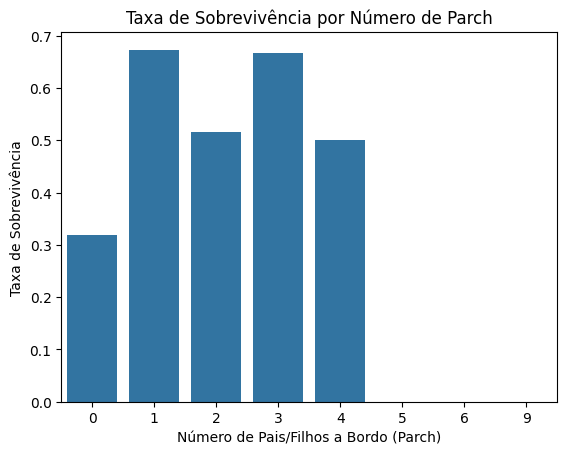

In [92]:
#The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

# Calcular a taxa de sobrevivência por número de pais/filhos a bordo
survival_by_parch = titanic_data.groupby('Parch')['Survived'].mean()

# Visualizar a relação entre Parch e sobrevivência
sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values)
plt.xlabel('Número de Pais/Filhos a Bordo (Parch)')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Número de Parch')
plt.show()

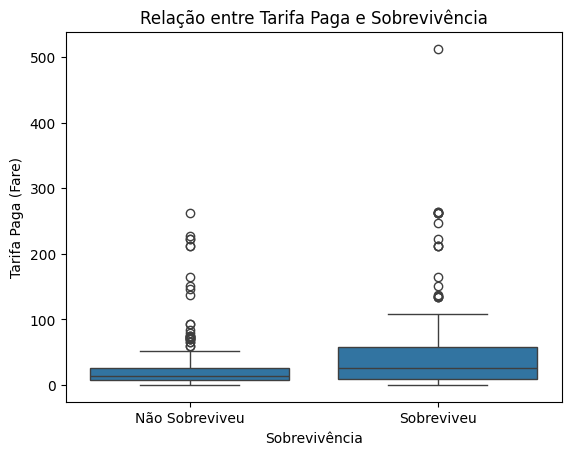

In [50]:
# Visualizar a relação entre tarifa e sobrevivência usando boxplot
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.xlabel('Sobrevivência')
plt.ylabel('Tarifa Paga (Fare)')
plt.title('Relação entre Tarifa Paga e Sobrevivência')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

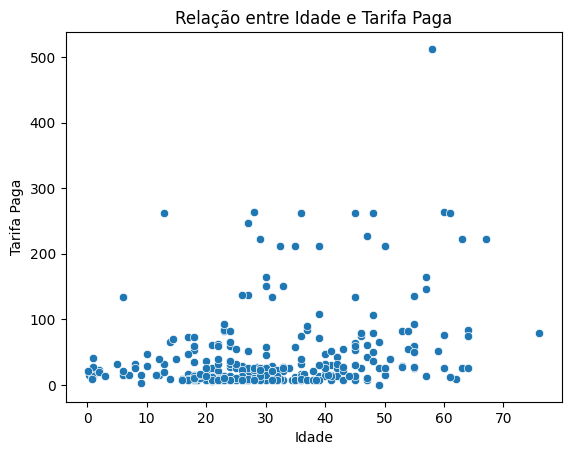

In [59]:
# Visualizar a relação entre idade e tarifa paga
sns.scatterplot(x='Age', y='Fare', data=titanic_data)
plt.xlabel('Idade')
plt.ylabel('Tarifa Paga')
plt.title('Relação entre Idade e Tarifa Paga')
plt.show()

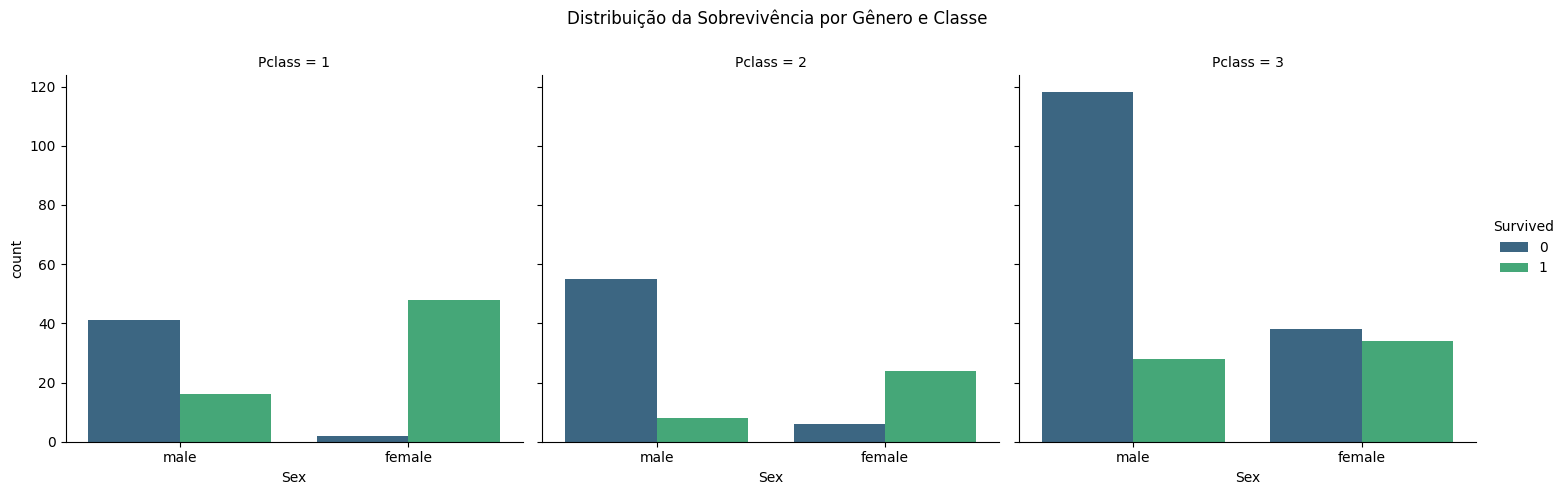

In [62]:
# Visualizar a distribuição da sobrevivência por gênero e classe
sns.catplot(x="Sex", hue="Survived", col="Pclass", data=titanic_data, kind="count", palette="viridis")
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribuição da Sobrevivência por Gênero e Classe')
plt.show()

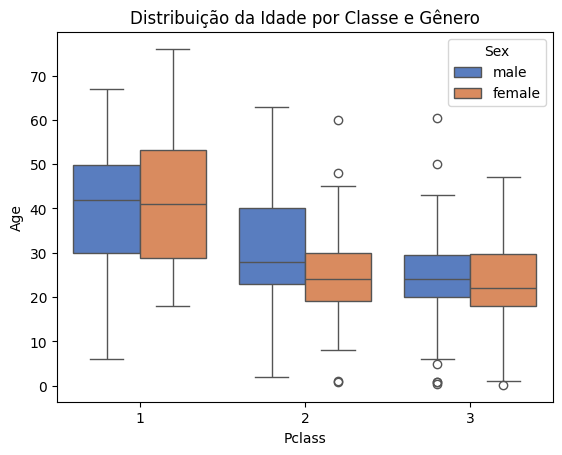

In [63]:
# Visualizar a distribuição da idade por classe e gênero
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=titanic_data, palette="muted")
plt.title('Distribuição da Idade por Classe e Gênero')
plt.show()

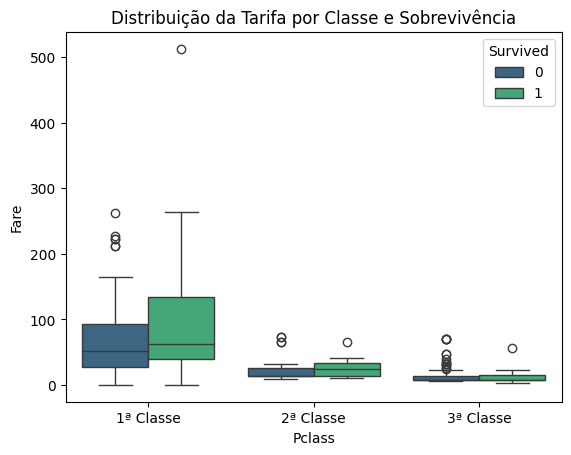

In [66]:
# Visualizar a distribuição da tarifa por classe e sobrevivência
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=titanic_data, palette="viridis")
plt.title('Distribuição da Tarifa por Classe e Sobrevivência')
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

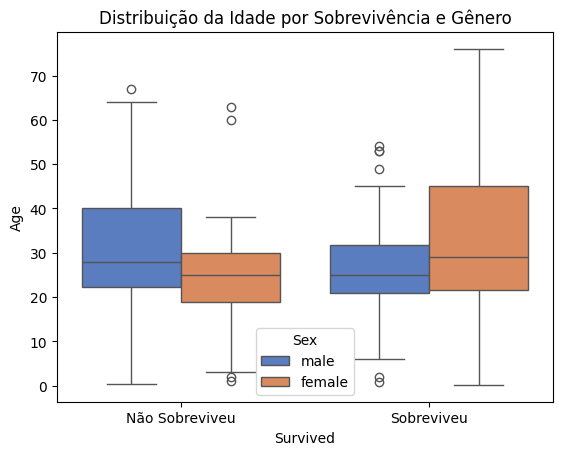

In [65]:
# Visualizar a distribuição da idade por sobrevivência e gênero
sns.boxplot(x="Survived", y="Age", hue="Sex", data=titanic_data, palette="muted")
plt.title('Distribuição da Idade por Sobrevivência e Gênero')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

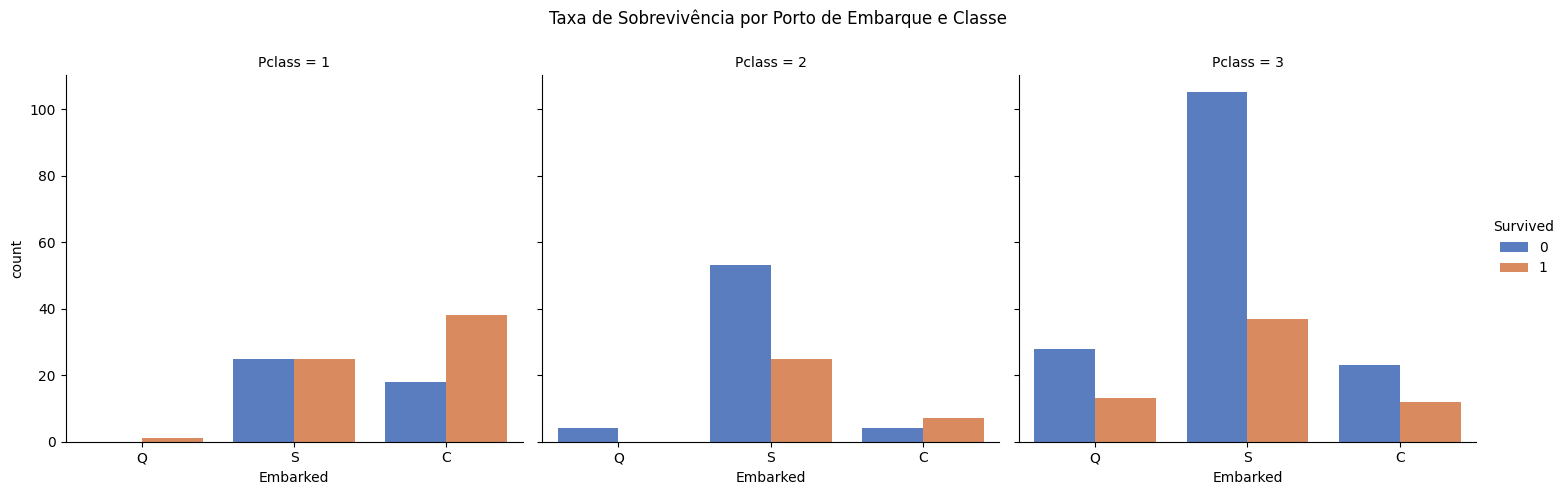

In [67]:
# Visualizar a taxa de sobrevivência por porto de embarque e classe
sns.catplot(x="Embarked", hue="Survived", col="Pclass", data=titanic_data, kind="count", palette="muted")
plt.subplots_adjust(top=0.85)
plt.suptitle('Taxa de Sobrevivência por Porto de Embarque e Classe')
plt.show()

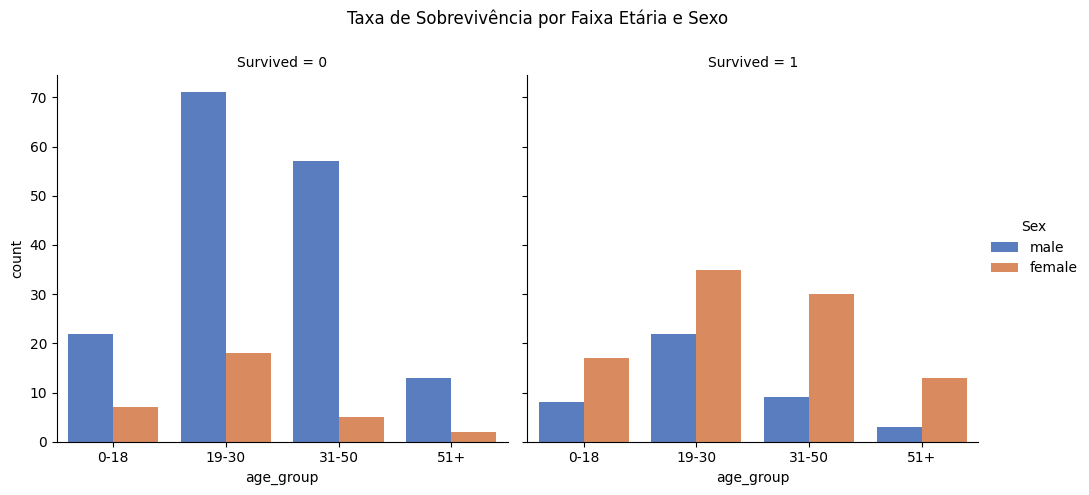

In [70]:
# Criar faixas etárias
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['0-12', '13-18', '19-30', '31-50', '51+']
titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)

# Visualizar a taxa de sobrevivência por faixa etária e sexo
sns.catplot(x="age_group", hue="Sex", col="Survived", data=titanic_data, kind="count", palette="muted")
plt.subplots_adjust(top=0.85)
plt.suptitle('Taxa de Sobrevivência por Faixa Etária e Sexo')
plt.show()

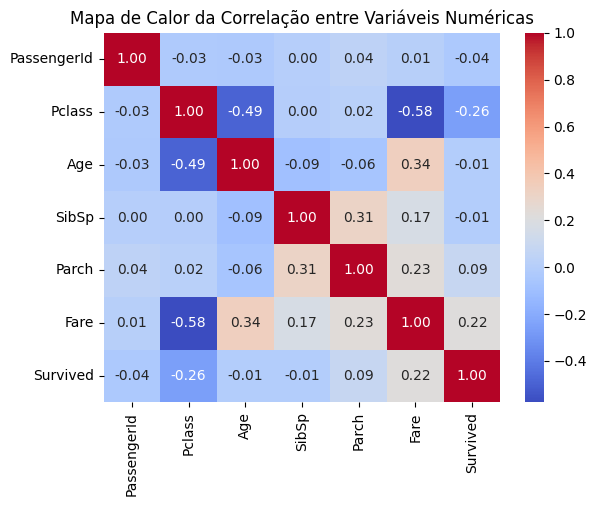

In [61]:
# Selecionar apenas as colunas numéricas para o mapa de calor
numeric_columns = titanic_data.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Visualizar a matriz de correlação como um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()